In [3]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline


from sklearn.cluster import DBSCAN
from collections import Counter

import sys
sys.path.append('../analysis/')
from csv_to_pandas import csv_into_dict_of_data

from plot_graph import remove_zero_columns

training_dataset = "../../csv/training_dataset"
testing_dataset = "../../csv/testing_dataset"
df_key = 'snmp'


In [4]:
df_dict = csv_into_dict_of_data(training_dataset)
df_dict = remove_zero_columns(df_dict)

In [10]:
epsilon = 3000
miniminum_points = 2

In [11]:
df = df_dict[df_key]

df = df.reindex(sorted(df.columns), axis = 1)
df.head()

,2018-09-08,2018-09-11,2018-09-13,2018-09-14,2018-09-15,2018-09-16,2018-09-17,2018-09-19,2018-09-20,2018-09-21,...,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31
Time,,,,,,,,,,,,,,,,,,,,,
00:00:00,11.0,22.0,22.0,23.0,22.0,22.0,11.0,0.0,2585.0,2538,...,677,338,167,376,228,47763,3242,5741,5665,3279
00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,107,...,2485,3045,3214,3138,2992,48402,185,147,144,228
00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3756.0,3635,...,732,327,278,359,513,47610,3269,3336,3334,3374
00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,54,...,2508,3041,3287,2715,2978,52982,27,93,44,57
01:00:00,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,3755.0,3731,...,566,225,180,610,419,48799,3201,3275,3279,3331


In [12]:
df = df.T 
# df.head()

In [13]:
model = DBSCAN(eps = epsilon, min_samples = miniminum_points).fit(df)
print(Counter(model.labels_))
# color_scheme = list(model.labels_)
# print(color_scheme)
# model.labels_

Counter({2: 72, -1: 49, 0: 7, 1: 7, 4: 3, 3: 2, 5: 2})


In [9]:
df_normal = pd.DataFrame(df)
normal = df_normal[model.labels_ != -1].T

Text(0.5, 1.0, 'snmp traffic within epsilon 9000 and min points 7')

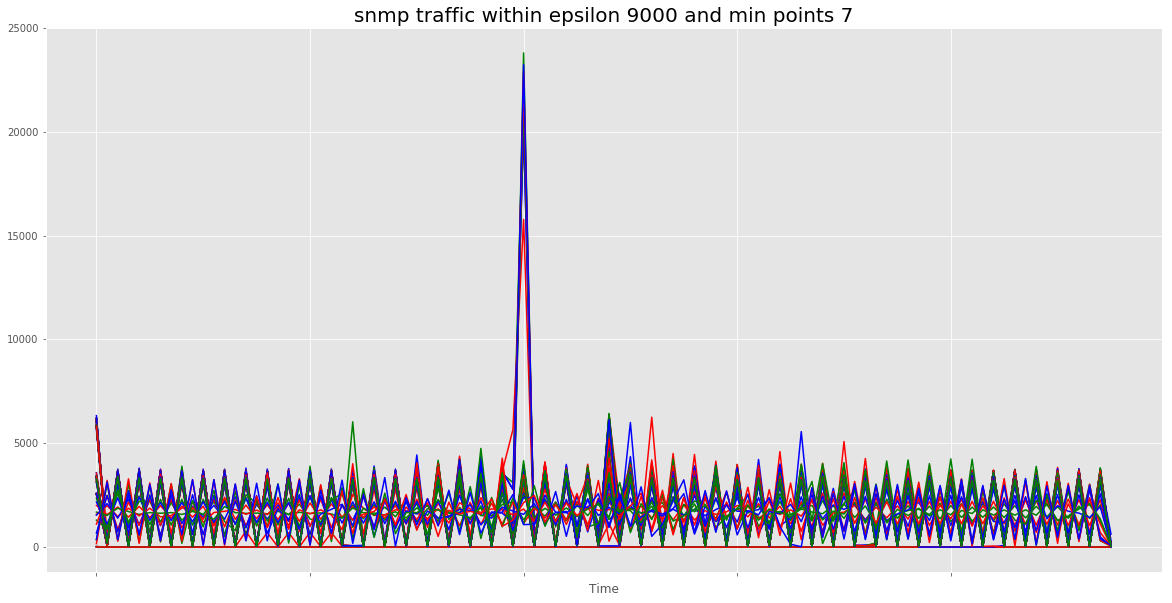

In [163]:
normal.plot(legend = False, figsize = (20, 10), color = ['r', 'b', 'g'])
title = df_key +' traffic within epsilon ' + str(epsilon) + ' and min points ' + str(miniminum_points)
plt.title(title, fontsize=20)


Text(0.5, 1.0, 'First Cluster: Failing at data collection (7)')

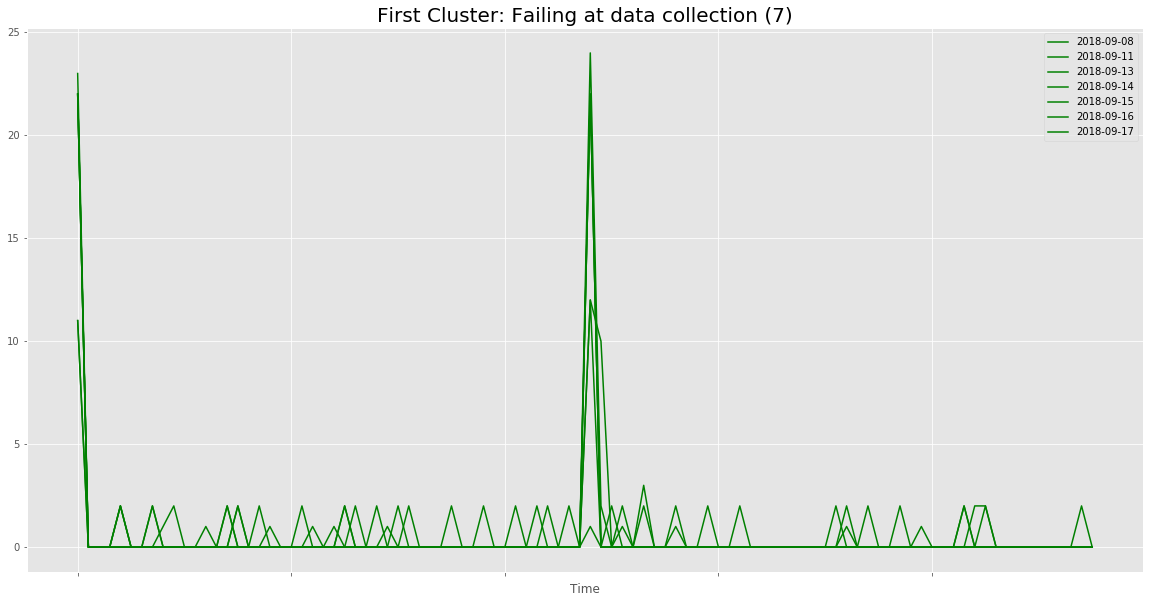

In [21]:
df_cluster0 = pd.DataFrame(df)
cluster0 = df_normal[model.labels_ == 0].T
title0 = 'First Cluster: Failing at data collection (' + str(len(cluster0.columns)) + ')' 
cluster0.plot( figsize = (20,10), color = 'g')
plt.title(title0, fontsize=20)

Text(0.5, 1.0, 'Second Cluster: First 2 Mondays??')

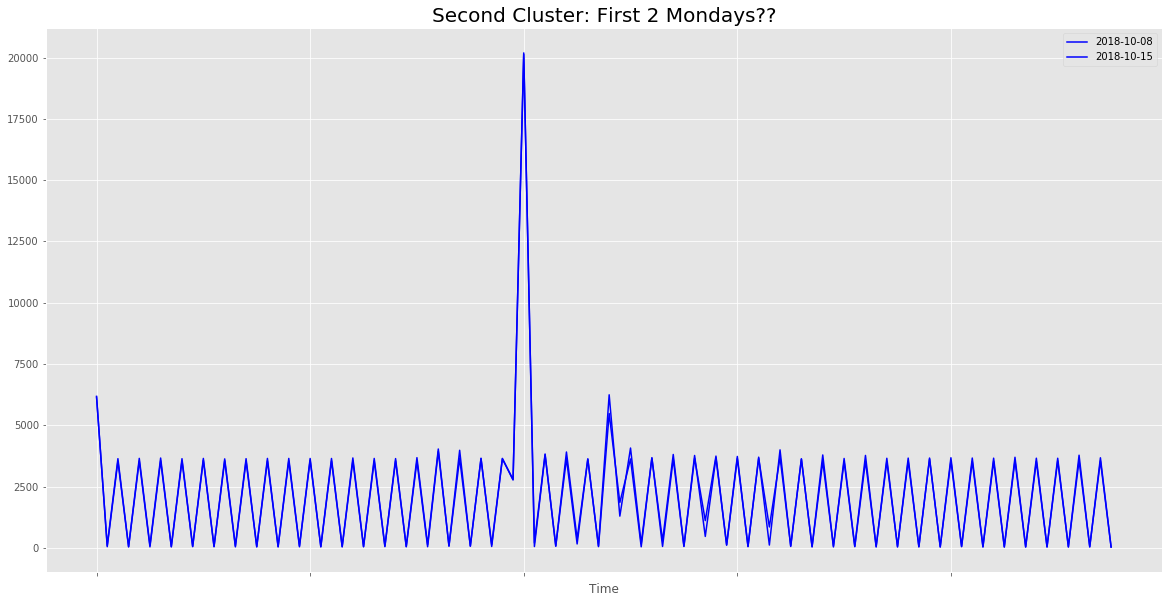

In [16]:
df_cluster2 = pd.DataFrame(df)
cluster2 = df_normal[model.labels_ == 3].T
title2 = 'Second Cluster: First ' + str(len(cluster2.columns)) + ' Mondays??'

cluster2.plot(figsize = (20,10), color = 'b')
plt.title(title2, fontsize = 20)

Text(0.5, 1.0, 'Final Cluster: Majority (2)')

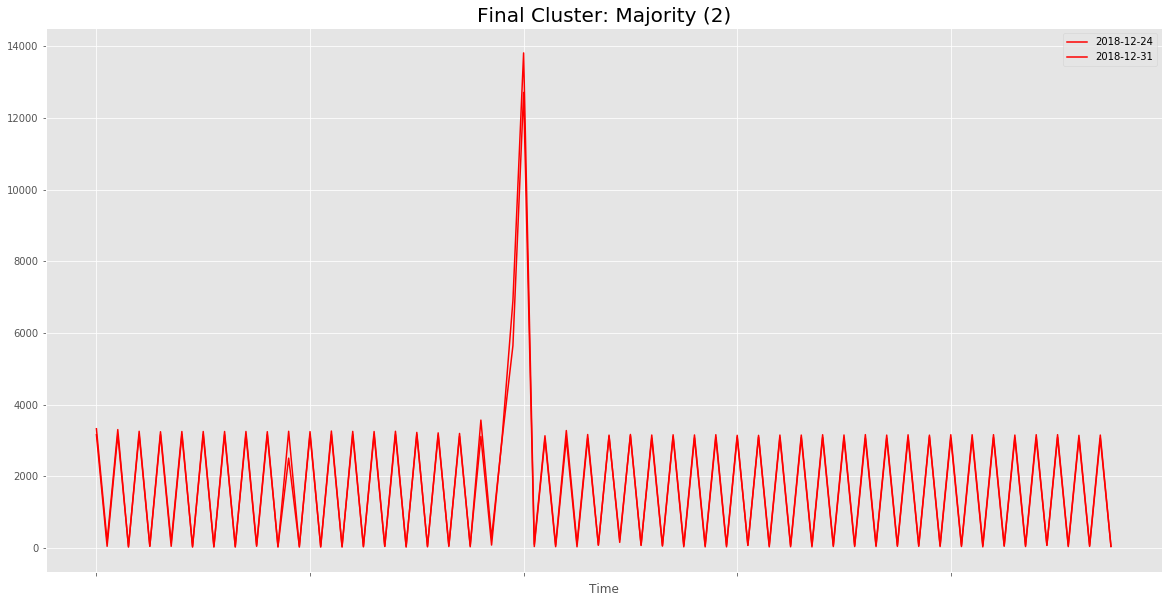

In [15]:
df_cluster1 = pd.DataFrame(df)
cluster1 = df_normal[model.labels_ == 5].T
total = len(cluster1.columns)
title1 = 'Final Cluster: Majority (' + str(total) + ')'

cluster1.plot(legend = True, figsize = (20,10), color = 'r')
plt.title(title1, fontsize = 20)


Text(0.5, 1.0, 'snmp traffic outlier (28)')

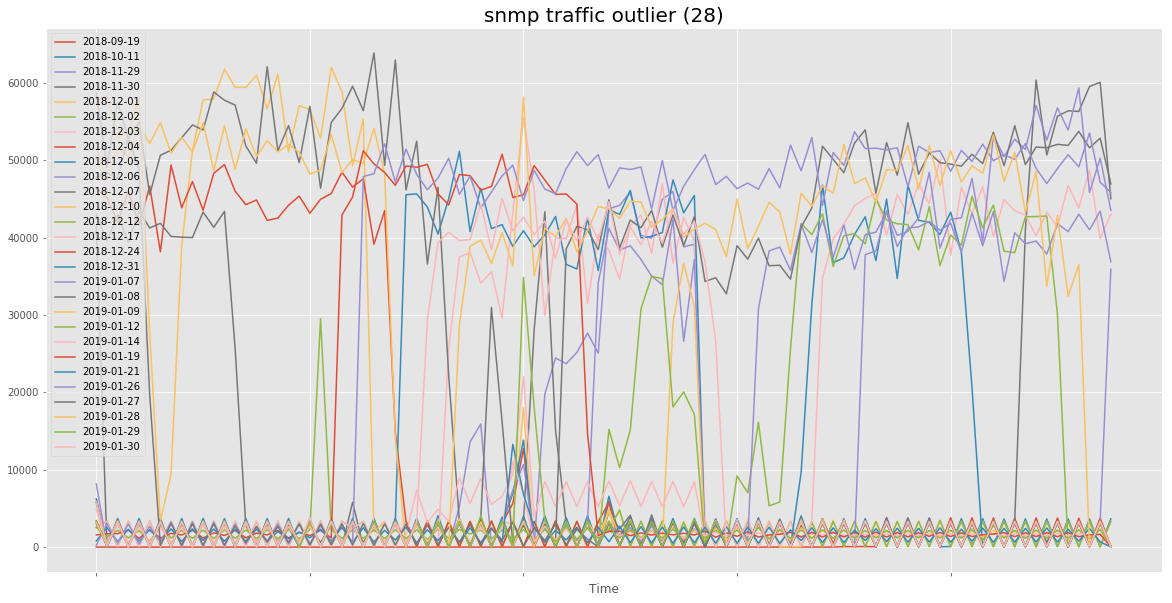

In [184]:
df_outlier = pd.DataFrame(df) 
outlier = df_outlier[model.labels_ == -1].T
title_o = df_key + ' traffic outlier (' + str( len(outlier.columns ) ) + ')'

outlier.plot(legend=True, figsize = (20, 10) )
plt.title(title_o, fontsize=20)

<h2><center>Alert on 26th and 27th!</center></h2>

Text(0.5, 1.0, 'Outliers 26th and 27th, compared to 2 previous days')

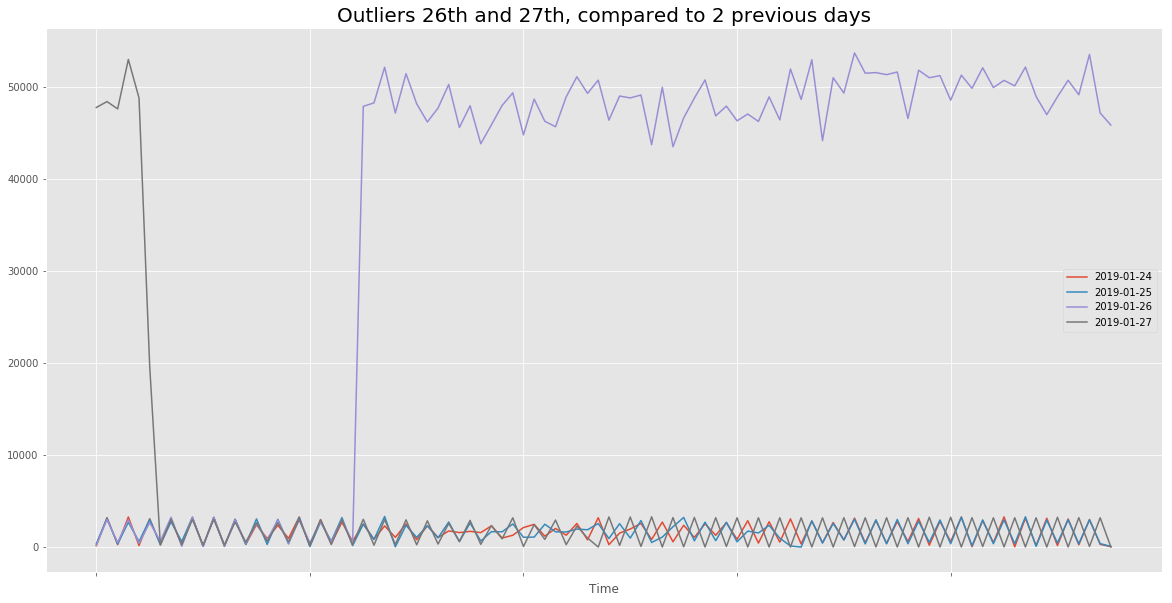

In [194]:
sample_df = df.T
sample_df = sample_df[['2019-01-24','2019-01-25','2019-01-26','2019-01-27']]
title_s = 'Outliers 26th and 27th, compared to 2 previous days'

sample_df.plot(legend=True, figsize = (20, 10) )
plt.title(title_s, fontsize=20)
